In [77]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

Load Dataset

In [78]:
# fetch dataset
in_vehicle_coupon_recommendation = fetch_ucirepo(id=603)

# data (as pandas dataframes)
X = in_vehicle_coupon_recommendation.data.features
y = in_vehicle_coupon_recommendation.data.targets
X = pd.concat([X,y], axis = 1)   # Merge the two Dataset
pd.set_option('display.max_columns', None)  # Show all columns
print(in_vehicle_coupon_recommendation.variables)
print(X.head())

                    name     role         type      demographic description  \
0            destination  Feature  Categorical             None        None   
1              passenger  Feature  Categorical             None        None   
2                weather  Feature  Categorical             None        None   
3            temperature  Feature      Integer             None        None   
4                   time  Feature  Categorical             None        None   
5                 coupon  Feature  Categorical             None        None   
6             expiration  Feature  Categorical             None        None   
7                 gender  Feature  Categorical           Gender        None   
8                    age  Feature      Integer              Age        None   
9          maritalStatus  Feature  Categorical   Marital Status        None   
10          has_children  Feature       Binary            Other        None   
11             education  Feature  Categorical  Educ

**Pre Processing:**

1. Identify the percentage of missing values in a bar chart

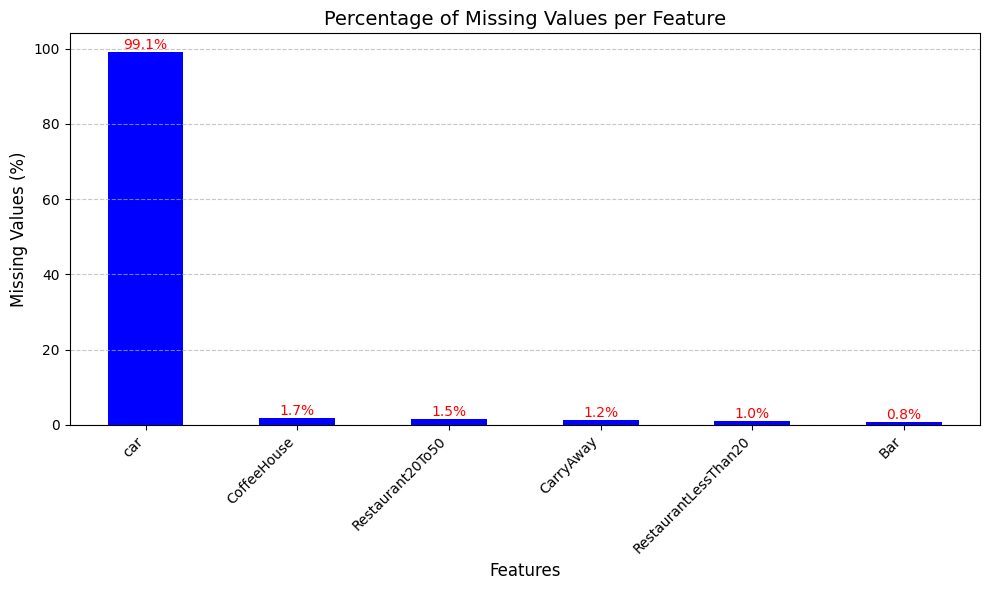

In [79]:
#Identify missing values and show them in a graphic
#based on that graphic we deside what to do with the columns, e.g drop the NA or drop the whole column instead
# 1. Calculate percentage of missing values for each column
missing_percent = X.isnull().mean() * 100                  ##TODO. Use the missing_percent variable in the step below, so it is not neccesary to name them all manually, and the graph
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# 2. Create the bar chart
plt.figure(figsize=(10, 6))
ax = missing_percent.plot(kind='bar', color='blue')

# 3. Add labels and title
plt.title('Percentage of Missing Values per Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# use of container
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', color='red')

plt.tight_layout()
plt.show()

Drop the NaN values

In [80]:
X.drop(X.columns[X.columns.str.contains('car')], axis=1, inplace=True) # We drop the column car completly
X = X.dropna()
print(X.isnull().sum())

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


Visualize the Outliers and skewedness of the numeric covariates

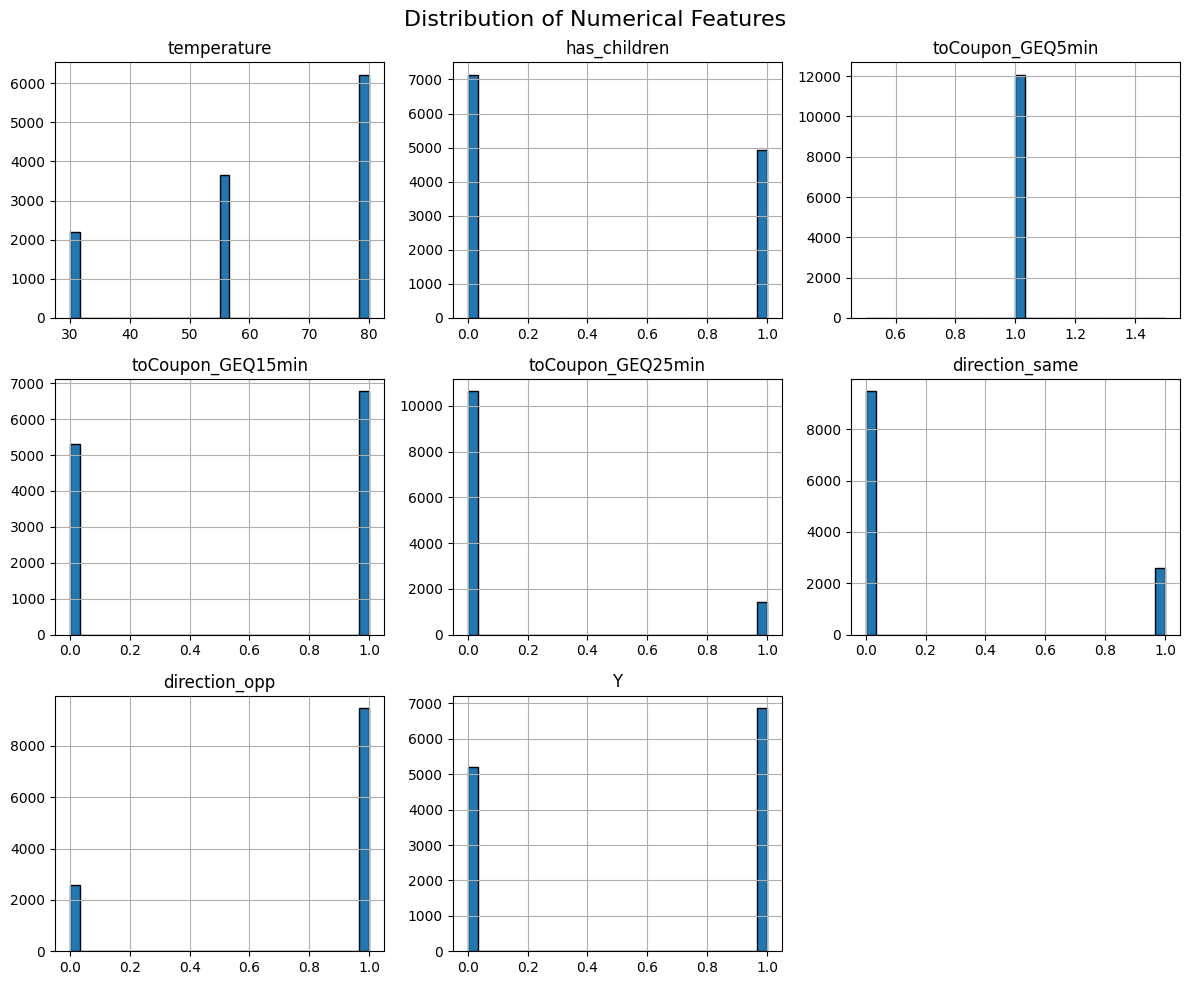

In [54]:
numeric_cols = X.select_dtypes(include=['number'])

numeric_cols.hist(
    bins=30, figsize=(12, 10), edgecolor='black'
)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()
#We see

One hot encoding

In [55]:
print(X.head())  # We See there are many categorical variables, thats why we have to encode them first

        destination  passenger weather  temperature  time  \
22  No Urgent Place      Alone   Sunny           55   2PM   
23  No Urgent Place  Friend(s)   Sunny           80  10AM   
24  No Urgent Place  Friend(s)   Sunny           80  10AM   
25  No Urgent Place  Friend(s)   Sunny           80  10AM   
26  No Urgent Place  Friend(s)   Sunny           80   2PM   

                   coupon expiration gender age maritalStatus  has_children  \
22        Restaurant(<20)         1d   Male  21        Single             0   
23           Coffee House         2h   Male  21        Single             0   
24                    Bar         1d   Male  21        Single             0   
25  Carry out & Take away         2h   Male  21        Single             0   
26           Coffee House         1d   Male  21        Single             0   

           education                  occupation           income  car    Bar  \
22  Bachelors degree  Architecture & Engineering  $62500 - $74999  NaN  never

In [44]:
from sklearn.preprocessing import OneHotEncoder
print(X.head())
X = pd.get_dummies(X, drop_first=False)    #Create dummy variables
X = X.replace({True: 1, False: 0}).infer_objects(copy=False)  #.infer_object(copy=false) to silence the warning that Future Versions will work in another way
print(X.head())

    temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
22           55             0                 1                  0   
23           80             0                 1                  0   
24           80             0                 1                  0   
25           80             0                 1                  1   
26           80             0                 1                  0   

    toCoupon_GEQ25min  direction_same  direction_opp  Y  destination_Home  \
22                  0               0              1  1                 0   
23                  0               0              1  0                 0   
24                  0               0              1  1                 0   
25                  0               0              1  0                 0   
26                  0               0              1  0                 0   

    destination_No Urgent Place  destination_Work  passenger_Alone  \
22                            1               

In [48]:
print(X.describe())


        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12079.000000  12079.000000           12079.0       12079.000000   
mean      63.334713      0.408478               1.0           0.561222   
std       19.133246      0.491573               0.0           0.496258   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  \
count       12079.000000    12079.000000   12079.000000  12079.000000   
mean            0.119381        0.215167       0.784833      0.569335   
std             0.324249        0.410955       0.410955      0.495190   
min             0.000000        0.000000 